<a href="https://colab.research.google.com/github/msssivadas10/climate-ml/blob/main/sealevel_fit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np, pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sbn

plt.style.use('seaborn')
mpl.rcParams['figure.figsize'] = (8, 4)


<ipython-input-1-d0b28af882b6>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [ ]:
from scipy.optimize import curve_fit

In [ ]:
df = pd.read_csv( 'https://raw.githubusercontent.com/msssivadas10/climate-ml/main/data/sealevel.csv', 
                   header = 0, na_values='NA', comment='#', sep=',', skipinitialspace=True )
df = df.dropna() # clean data

df['CO2.Emission'] *= 1e-09
df['Global.Temperature.Rise']  -= df['Global.Temperature.Rise'].min()

df.head()

,Year,Sea.Level,CO2.Emission,Global.Temperature.Rise
0,1880,0.000000,0.853707,0.27
1,1881,0.220472,0.882407,0.35
2,1882,-0.440945,0.931925,0.37
3,1883,-0.232283,0.991036,0.26
4,1884,0.590551,1.002178,0.19


In [30]:
# fitting

def f(x, a, b, c):
    return a + b*np.exp(c*x)

# years --> betweem 1880 (to 0) and 2050 (to 1) 
x = df['Year'].values
a, b = 1880, 2050
x = (x - a) / (b - a)

popt, _ = curve_fit(f, x, df['Sea.Level'].values, p0 = [0.0, 1.0, 1.0])
print(popt)

df['Sea.Level.Fit'] = f(x, *popt) 

[-4.05833015  4.20331967  1.41856876]


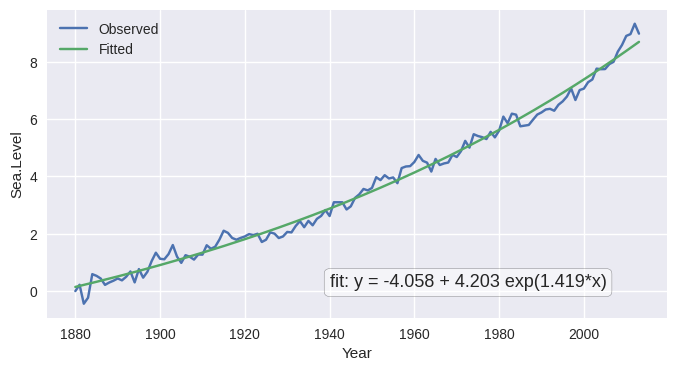

In [31]:
sbn.lineplot(df, x='Year', y='Sea.Level', label = 'Observed')
sbn.lineplot(df, x='Year', y='Sea.Level.Fit', label = 'Fitted')

plt.text(1940, 0.0, 'fit: y = {0:.3f} + {1:.3f} exp({2:.3f}*x)'.format(*popt), fontsize = 13,
         verticalalignment='bottom', bbox = dict(boxstyle='round', facecolor='white', alpha=0.5))

plt.savefig('sealevel-data.eps', format='eps')